In [1]:
import re
import sys
import pyforest
import collections
import texthero as hero
from texthero import preprocessing

In [16]:
rto_data = pd.read_excel("RTO_details.xlsx")
inspection_data = pd.read_csv("inspection data.csv",low_memory=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
rto_data.head()

,RegNo,Place,State
0,AN01,"Port Blair, Andaman District",Andaman & Nicobar Islands
1,AN02,"Car Nicobar, Nicobar District",Andaman & Nicobar Islands
2,AP01,Adilabad / Mancherial / Nirmal,Andhra Pradesh
3,AP02,Anantapur / Hindupur,Andhra Pradesh
4,AP03,Chittoor / Tirupati / Madanapalle / Rajampet,Andhra Pradesh


In [18]:
inspection_data.shape

(605926, 11)

In [19]:
#store state code and state name in dictionary
state_codes= {}
for i in range(len(rto_data.RegNo)):
    code = rto_data.RegNo.iloc[i].strip()
    if code[:2] not in state_codes:
        state_codes[code[:2]] = rto_data.State.iloc[i]

In [20]:
inspection_data.head()

,id,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,SUB_MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO
0,1,221928.0,30-10-2014,22-10-2017,29-10-2017,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
1,2,221928.0,30-10-2014,22-10-2017,29-10-2017,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
2,3,221928.0,30-10-2014,22-10-2017,29-10-2017,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
3,4,185050.0,28-02-2014,21-12-2017,21-12-2017,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162
4,5,185050.0,28-02-2014,21-12-2017,21-12-2017,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162


In [21]:
#drop id column
inspection_data = inspection_data.drop('id',axis=1)

In [22]:
#dropping the dulplicate values
inspection_data = inspection_data.drop_duplicates().reset_index(drop=True)

In [23]:
inspection_data.head()

,KMS,SALE_DT,REPORT_DT,REPAIR_DT,MODEL,SUB_MODEL,CMPL_DESC,INVESTIGATION,ACTION_TAKEN,REG_NO
0,221928.0,30-10-2014,22-10-2017,29-10-2017,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS COME WITH COMPLAINT OIL LEACKEGE F...,AFTER INVESTIGATION WE FOUND MINOR CRAKE ON RE...,WE HAVE REPLACED REAR AXLE TUBE U/WARRANTYDEFE...,HR38U8155
1,185050.0,28-02-2014,21-12-2017,21-12-2017,3518TC-LPS,HCV-TRUCKS,DIFFERENTIAL NOISY.,AFTER INVESTIGATION WE ARE FOUND THAT CROWN TA...,ALL JOB CARRIED OUT UNDER WARRANTY.,NL01L2162
2,217890.0,29-08-2014,21-12-2017,21-12-2017,2518TC-LPT,HCV-TRUCKS,VEHICLE HAS BRAKEDOWN WITH CAC COMPLAINT REAR ...,WE HAVE ATTEND THE VEHICLE ON SIDE FOUND THAT ...,REPLACED REAR AXLE TUBE UNDER WARRANTYDEFER.TX...,UP82T2306
3,150723.0,25-08-2015,13-12-2017,14-12-2017,2518TC-LPT,HCV-TRUCKS,ASSY GEAR BOX NOISY,VEHICLE CAME IN OUR WORKSHOP ASSY GEAR BOX NOI...,REPLCED UNDER WARRANTYDEFER.TXT 0006,UP15CT2727
4,162639.0,14-11-2014,18-12-2017,18-12-2017,2518TC-LPT,HCV-TRUCKS,DIFFERENTIAL NOISY.,ON INVESTIGATION FOUND THE CROWN AND PINION TE...,AFFECTED PARTS REPLACED UNDER WARRANTY.DEFER.T...,MP20HB5022


In [24]:
#check null values in each clolumn
(inspection_data.isna().sum())/len(inspection_data)*100

KMS               3.174725
SALE_DT           3.145353
REPORT_DT         3.145353
REPAIR_DT         3.145353
MODEL             3.145353
SUB_MODEL        76.273849
CMPL_DESC         0.006385
INVESTIGATION     0.007662
ACTION_TAKEN      0.011493
REG_NO            0.062575
dtype: float64

In [25]:
#sub model 76 persent null vaules so we drop SUB_MODEL column
inspection_data.drop('SUB_MODEL',axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

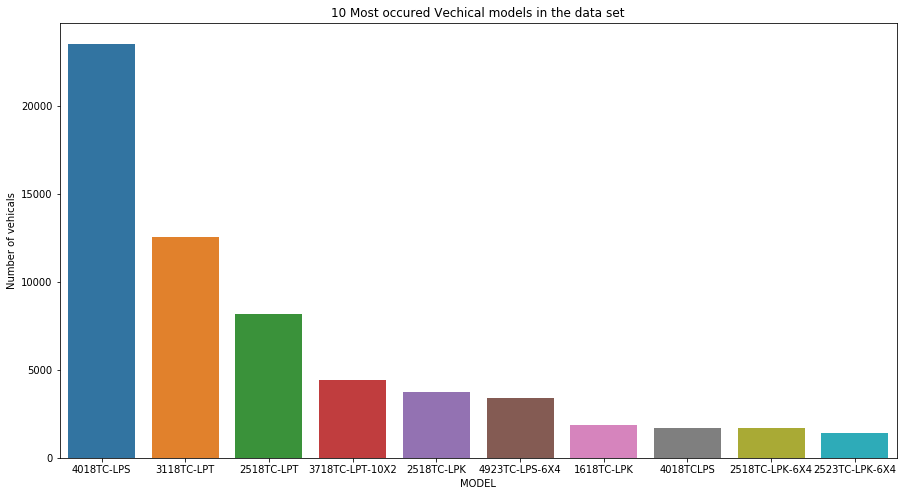

In [26]:
x = inspection_data.MODEL.value_counts().index[:10]
y = inspection_data.MODEL.value_counts()[:10]
plt.figure(figsize=(15,8))
sns.barplot(x,y)
plt.xlabel('MODEL')
plt.ylabel("Number of vehicals")
plt.title("10 Most occured Vechical models in the data set")
plt.show()

### The graph shows that model "4018TC-LPS"  have highest complaints

In [27]:
inspection_data.shape

(78306, 9)

Count state Wise registrations of Vechicals

In [28]:
inspection_data['PLACE'] = [ str(reg_no).strip()[:2] if reg_no != None else reg_no for reg_no in inspection_data.REG_NO ]

In [29]:
#extract statenames from the places
states = [place[:2]  for place in inspection_data.PLACE if place != None]

In [30]:
#dictionary to store counting of states
state_count = {} 
for state in states: 
    state_count[state] = state_count.get(state, 0) + 1

#sort the state on the basis of number of vechicals
state_count = sorted(state_count.items(),key = lambda item: item[1],reverse=True)
state_codes['HP'] = "Himachal Pradesh"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

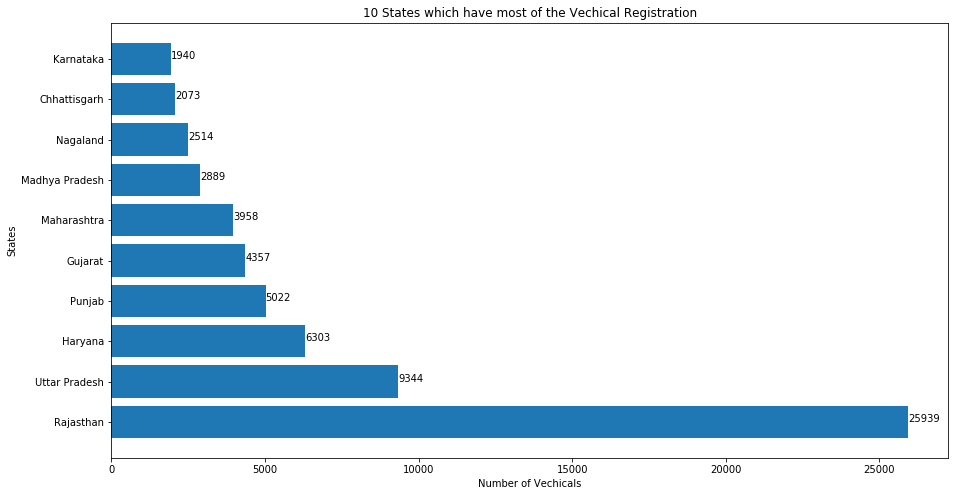

In [31]:
#ploting top 10 states having most registered vechicals
x = [state_codes[state_count[i][0]]  if state_count[i][0] in state_codes else 'Odisha' for i in range(10)]
y = [state_count[i][1] for i in range(10)]
plt.figure(figsize=(15,8))
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.title('10 States which have most of the Vechical Registration')
plt.xlabel('Number of Vechicals')
plt.ylabel('States')
plt.show()

### We can clearly see that Rajasthan has the highest number of registered vechicals.

In [32]:
def place_to_state(place):
    """
    Map the values in the dataset to state
    """
    if place in state_codes:
        return state_codes[place]
    
#generate new column place it store details where the vechical registered 
inspection_data["PLACE"] = inspection_data.PLACE.apply(place_to_state)

In [33]:
#day to taken in reparing the vechical
report_date = pd.to_datetime(inspection_data.REPORT_DT,dayfirst=True)
repair_date = pd.to_datetime(inspection_data.REPAIR_DT,dayfirst=True)
sale_date = pd.to_datetime(inspection_data.SALE_DT,dayfirst=True)
inspection_data['repair_days'] = repair_date - report_date
inspection_data['days_to_breakdown'] = report_date - sale_date

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))

def remove_stop_words(text):
    """
    remove stop word from the text 
    and return the text
    """
    text = text.split()
    return ' '.join([word for word in text if word not in s ])

In [35]:
#list all preprocessing steps used by texthero library to clean data
custom_pipeline = [preprocessing.remove_digits,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_brackets,
                   preprocessing.remove_punctuation,
                  preprocessing.remove_square_brackets]

In [36]:
from nltk import stem
from nltk.tokenize import word_tokenize

lemmatizer = stem.WordNetLemmatizer()

def lemmatization(text):
    """
    lemmatize each word of text
    and return the text
    """
    text = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in text])

In [37]:
def clean_text_data(df,columns):
    """
    Clean text data
    args : dataframe and columns that have text data
    output: dataframe after cleaning columns
    """
    for col in columns:
        df[col] = df[col].apply(lambda s : str(s))
        df[col] = hero.clean(df[col], custom_pipeline)
        df[col] = df[col].apply(remove_stop_words)
        df[col] = df[col].apply(lambda text : ''.join(text.split('.')))
        df[col] = df[col].apply(lemmatization)
    return df

In [38]:
text_cols = ['CMPL_DESC','INVESTIGATION','ACTION_TAKEN']
inspection_data = clean_text_data(inspection_data,text_cols)

In [39]:
def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())

def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams

def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    print(f'----- Most Common Complains -----')
    descriptions,counts = [],[]
    most_common_problems = ngrams[3].most_common(50)
    i = 0
    while True:
        try:
            gram, count = most_common_problems[i][0],most_common_problems[i][1]
            description = set(gram)
            if description in descriptions:
                index = descriptions.index(description)
                counts[index] = counts[index] + count
            else:
                descriptions.append(description)
                counts.append(count)
            if len(descriptions)>=num:
                break
            i = i+1
        except:
            break
    #print ngrams and counts
    if len(descriptions) == 0:
        print("No vehical Registered")
    for i in range(len(descriptions)):
        print(f"{' '.join(descriptions[i])}: {counts[i]}")
    print('')

## State wise analysis of complaints in vehicals

In [40]:
inspection_data.CMPL_DESC = inspection_data.CMPL_DESC.apply(lambda text : re.sub(r'differential','diff',text))

In [41]:
def complaint_description(df,state_name):
    state_df = df[df["PLACE"] == state_name]
    state_complain_trigrams = count_ngrams(state_df.CMPL_DESC,3,3)
    print_most_frequent(state_complain_trigrams, num=10)

In [42]:
for state in list(state_codes.values()):
    print(f"State Name : {state}")
    complaint_description(inspection_data,state)
    print("\n----------*****-----------------\n")

State Name : Andaman & Nicobar Islands
----- Most Common Complains -----
No vehical Registered


----------*****-----------------

State Name : Andhra Pradesh
----- Most Common Complains -----
come unusual noise: 224
come gear noise: 196
come gear box: 171
gear assly box: 171
noisy gear box: 261
shifting assly box: 164
gear noise box: 233
gear assly shifting: 97
work vehicle came: 83
work shop came: 75


----------*****-----------------

State Name : Arunachal Pradesh
----- Most Common Complains -----
noisy gear box: 2
noisy nd box: 1
noisy nd 5th: 1
nd gear 5th: 1
gear slipage 5th: 1
gear vehicle slipage: 1
reported vehicle slipage: 1
reported complaint vehicle: 1
reported complaint gear: 1
complaint gear box: 1


----------*****-----------------

State Name : Assam
----- Most Common Complains -----
noisy gear box: 1361
noisy diff: 180
reported noisy vehicle: 162
gear noisy diff: 136
noisy diff box: 125
reported complaint workshop: 124
reported workshop customer: 122
gear noise box: 1

----- Most Common Complains -----
noisy diff: 2861
noisy gear box: 3312
gear noisy diff: 705
noisy crown: 482
noisy diff box: 452
noisy rear axle: 735
gear noise box: 303
gear hard shifting: 213
axle rear noise: 201
oil engine consumption: 193


----------*****-----------------

State Name : West Bengal
----- Most Common Complains -----
noisy gear box: 712
rear axle tube: 213
noisy diff: 225
axle tube cracked: 121
gear noisy diff: 105
noisy rear axle: 102
diff noise came: 83
noisy diff box: 73
axle tube crack: 72
abnormal noise diff: 68


----------*****-----------------

State Name : Telangana
----- Most Common Complains -----
gear noise box: 396
noise diff: 96
gearbox noise: 32
noise diff box: 31
gear noise diff: 29
engine noise box: 28
noise housing: 28
come unusual noise: 24
gear noise housing: 21
come gear noise: 21


----------*****-----------------



## Overall Complaints in Vechicals :

In [43]:
complain_trigrams = count_ngrams(inspection_data.CMPL_DESC,3,3)
print_most_frequent(complain_trigrams, num=20)

----- Most Common Complains -----
noisy gear box: 37579
noisy diff: 14170
gear noisy diff: 5307
noisy diff box: 4031
gear noise box: 5632
oil engine consumption: 2640
oil consumption high: 1863
gear hard shifting: 1777
noisy engine box: 1747
noisy oil engine: 1559
noisy engine diff: 1517
noisy rear axle: 2499
noisy crown: 1241
reported noisy vehicle: 1230
reported complaint workshop: 1181
reported workshop vehicle: 1164
noisy gear: 1118
rear axle tube: 1024
noisy gear shifting: 1024
axle rear noise: 921



In [44]:
gear_box_complaint_index = []
for index,complain in enumerate(inspection_data.CMPL_DESC):
    if 'gear box noisy' in complain:
        gear_box_complaint_index.append(index)

In [45]:
model = inspection_data.iloc[gear_box_complaint_index].MODEL.value_counts()[:10].index[0]
print(f"{model} have highest number of 'gear box noisy' problem")

4018TC-LPS have highest number of 'gear box noisy' problem


In [46]:
df = inspection_data.iloc[gear_box_complaint_index]
df = df[df['MODEL'] == "4018TC-LPS"]
df.repair_days = df.repair_days.apply(lambda d : int(str(d)[0]))

In [47]:
print(f"{model} take average %.2f days for repairing the 'gear box noisy' problem"%np.mean(df.repair_days))

<IPython.core.display.Javascript object>

4018TC-LPS take average 1.25 days for repairing the 'gear box noisy' problem


## Analysing some average values :

In [48]:
def int_days(day):
    """return interger value for number of repair days"""
    try :
        return(int(str(day)[0]))
    except:
        return(0)
repair_days = inspection_data.repair_days.apply(int_days)
print("Average time taken for repairing the vechicals %.2f days"%np.mean(repair_days))

<IPython.core.display.Javascript object>

Average time taken for repairing the vechicals 1.42 days


In [49]:
def int_breakdown_days(day):
    """return interger value for number of repair days"""
    try :
        return(int(str(day).split()[0]))
    except:
        return(0)
    
breakdown_list = list()
models = [model for model in inspection_data.MODEL.unique() if str(model) != 'nan']
for model in models:
    sub_df = inspection_data[inspection_data["MODEL"] == model]
    breakdown_days = sub_df.days_to_breakdown.apply(int_breakdown_days)
    print(f"{model} take average %.2f day before breakdown"%np.mean(breakdown_days))
    breakdown_list.append(np.mean(breakdown_days))


<IPython.core.display.Javascript object>

2518TC-LPT take average 1125.17 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3518TC-LPS take average 1075.58 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC-LPK-6X4 take average 961.90 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TC-LPT take average 1122.26 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4018TC-LPS take average 1122.80 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC-LPK take average 768.35 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3718TC-LPT-10X2 take average 958.73 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613-LPT take average 1076.48 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TC-LPK-6X4 take average 792.98 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC-LPK-HD-6X4 take average 647.88 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-2528K take average 964.82 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4923TC-LPS-6X4 take average 1048.81 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1615TC-LPT take average 960.17 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613TC-SFC take average 1077.29 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1618TC-LPK take average 823.21 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-3123T take average 1027.09 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-2523K take average 1028.35 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613TC-LPT take average 1098.72 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-3123K take average 1039.82 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613-SK take average 938.53 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3723TC-LPT take average 1228.21 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-4023S take average 1130.99 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TC-LPK take average 600.14 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC-LPTK take average 807.97 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-4028S take average 1092.64 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-2523T take average 1127.72 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613-SE take average 1022.07 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC-LPK-RMC take average 1093.55 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TC-LPK-HD-6X4 take average 846.63 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TC-LPK-8X4 take average 945.78 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-4923S take average 1145.82 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TC-LPK-8X2 take average 1019.25 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TC-LPTK-8X2 take average 762.65 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613-LPK take average 1175.64 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1615TC-LPK take average 710.71 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613-SFC take average 1201.67 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-2528K take average 920.27 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1212TC-SA-4X4 take average 849.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-4928S take average 1326.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613SK take average 963.95 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-4028S take average 911.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-3128K take average 1216.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-4928S take average 1105.44 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2521TC-LPT-6X4 take average 987.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TC take average 1028.26 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4018TC take average 1012.85 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX4923 take average 1211.91 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC take average 919.04 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3718TC take average 848.93 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613 take average 776.41 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613TC take average 973.25 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4923TC take average 971.88 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1618TC take average 742.15 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3518TC take average 1111.72 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX2523 take average 912.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA2528 take average 761.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TC take average 705.20 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX4023 take average 1067.14 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3723TC take average 1396.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1615TC take average 675.50 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX4028 take average 838.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX3123 take average 894.50 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX4928 take average 827.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TC-HD-LPK take average 473.41 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613TC-SE take average 687.62 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4938TC-LPS-6X4 take average 1160.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TC-LPT-6X4 take average 873.33 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SIGNA1618.K take average 440.44 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-3128K take average 885.67 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2528TC-LPK-6X4 take average 932.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1615TC -LPK take average 356.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SIGNA4923.S take average 750.86 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TCLPKHD6X4 take average 619.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4018TCLPS take average 1140.34 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TCLPK take average 761.72 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4923TCLPS6X4 take average 1025.31 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TCLPT take average 1131.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3718TCLPT10X2 take average 1009.94 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TCLPK take average 566.38 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TCLPT take average 1145.59 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TCHDLPK take average 303.78 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3518TCLPS take average 1058.90 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TCLPKHD6X4 take average 949.88 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2523TCLPK6X4 take average 851.02 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX2523K take average 1019.29 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TCLPK6X4 take average 899.97 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TCLPTK8X2 take average 807.17 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1618TCLPK take average 831.49 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX4023S take average 1239.49 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX3123K take average 1094.80 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TCLPTK take average 714.14 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613LPT take average 1213.02 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1615TCLPT take average 903.08 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX4923S take average 1336.48 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2518TCLPKRMC take average 1262.89 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA4028S take average 1396.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX2523T take average 1135.80 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TCLPK8X4 take average 1256.67 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613SFC take average 1056.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3723TCLPT take average 1433.60 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613SE take average 1052.25 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3118TCLPK8X2 take average 1135.50 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1615TCLPK take average 441.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMALX3123T take average 1058.67 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2521TCLPT6X4 take average 925.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2521TCLPT6X2 take average 810.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1613TCLPT take average 1389.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SIGNA2523KHD take average 308.00 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SIGNA4018.S take average 775.21 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2521TC-LPT-6X2 take average 962.88 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-2525K take average 533.47 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-3125K take average 426.33 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-LX-3130K take average 360.61 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SIGNA-2523K-HD take average 432.33 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA-2530K take average 482.50 day before breakdown


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PRIMA 2530.K take average 325.33 day before breakdown


<IPython.core.display.Javascript object>

In [50]:
print(f"'{models[breakdown_list.index(max(breakdown_list))]}' model take  maximum days to breakdown")
print(f"'{models[breakdown_list.index(min(breakdown_list))]}' model take minimum days to breakdown")

'3723TCLPT' model take  maximum days to breakdown
'2523TCHDLPK' model take minimum days to breakdown
